Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Druga laboratorijska vježba - Analiza glavnih komponenti, Faktorska analiza, Multivarijatna linearna regresija, Kanonička korelacijska analiza

**Rok za predaju: 7. svibnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [495]:
# Učitajte sve potrebne biblioteke
# <Vaš kôd ovdje>
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from factor_analyzer import FactorAnalyzer
import statsmodels.api as sm
from linearmodels import SUR
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn import preprocessing


### 0. Podatkovni skup

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne tjedne cijene ETF-ova (eng. exchange traded fund) koji prate određene dioničke, obvezničke ili druge indekse. Konkretno, radi se o sljedeća 22 fonda:

- `AGG` (iShares Core U.S. Aggregate Bond ETF) - obveznice s američkog tržišta,
- `IEF` (iShares 7-10 Year Treasury Bond ETF) - srednjeročne državne obveznice,
- `LQD` (iShares iBoxx $ Investment Grade Corporate Bond ETF) - korporativne obveznice,
- `SHY` (iShares 1-3 Year Treasury Bond ETF) - kratkoročne državne obveznice,
- `TIP` (iShares TIPS Bond ETF) - državne obveznice zaštićene od inflacije,
- `TLT` (iShares 20+ Year Treasury Bond ETF) - dugoročne državne obveznice,
- `DBC` (Invesco DB Commodity Index Tracking Fund) - sirovine i roba,
- `GLD` (SPDR Gold Trust) - zlato,
- `USO` (United States Oil Fund) - nafta,
- `IJH` (iShares Core S&P Mid-Cap ETF) - dionice tvrtki s američkog tržišta,
- `IWM` (iShares Russell 2000 ETF) - dionice američkih tvrtki s malim kapitalom,
- `SPY` (SPDR S&P 500 ETF Trust) - dionice tvrtki s američkog tržišta,
- `VTV` (Vanguard Value ETF) - dionice tvrtki s američkog tržišta,
- `XLB` (Materials Select Sector SPDR Fund) - dionice tvrtki za materijale,
- `XLE` (Energy Select Sector SPDR Fund) - dionice tvrtki energetskog sektora,
- `XLF` (Financial Select Sector SPDR Fund) - dionice tvrtki financijskog sektora,
- `XLI` (Industrial Select Sector SPDR Fund) - dionice tvrtki industrijskog sektora,
- `XLK` (Technology Select Sector SPDR Fund) - dionice tvrtki iz tehnološkog sektora,
- `XLP` (Consumer Staples Select Sector SPDR Fund) - dionice tvrki za necikličku potrošačku robu,
- `XLU` (Utilities Select Sector SPDR Fund) - dionice tvrtki komunalnih djelatnosti,
- `XLV` (Health Care Select Sector SPDR Fund) - dionice tvrtki iz zdravstvenog sektora,
- `XLY` (Consumer Discretionary Select Sector SPDR Fund) - dionice tvrtki za cikličku potršačku robu,
- `IYR` (iShares U.S. Real Estate ETF) - dionice tvrtki iz područja nekretnina,
- `VNQ` (Vanguard Real Estate Index Fund) - dionice tvrtki iz područja nekretnina.

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati: $R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$ gdje je $S(t)$ cijena vrijednosnice u trenutku (tjednu) $t$. 

#### (a)
Podaci se nalaze u datoteci "ETFprices.csv". Učitajte ih, provjerite ispravnost, izračunajte tjedne povrate te vizualizirajte matricu korelacije povrata. U ostatku laboratorijske vježbe također koristite povrate, a ne cijene. 

In [417]:
# <Vaš kôd ovdje>
data = pd.read_csv('ETFprices.csv')
rows = len(data)
cols = len(data.columns)
data_povrat = data.copy()
for i in range(0,rows):
    if i != 0:
        for j in range(1, cols):
            data_povrat.iloc[i,j] = (data.iloc[i,j] - data.iloc[i-1,j])/data.iloc[i-1,j] 
data_povrat.drop(index=data_povrat.index[0], axis=0, inplace=True)
corr = data_povrat.corr()
corr.style.background_gradient(cmap='coolwarm')




C:\Users\matij\AppData\Local\Temp\ipykernel_17200\2778472530.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_povrat.corr()


,AGG,IEF,LQD,SHY,TIP,TLT,DBC,GLD,USO,IJH,IWM,SPY,VTV,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,IYR,VNQ
AGG,1.000000,0.674567,0.743219,0.445537,0.641231,0.549920,-0.014931,0.076399,-0.095956,0.026023,-0.004152,0.097081,0.053050,-0.020383,0.058959,-0.000820,-0.018219,0.011581,0.164157,0.303336,0.190340,0.006004,0.057064,0.057891
IEF,0.674567,1.000000,0.624745,0.726050,0.718810,0.893006,-0.229704,0.185235,-0.254077,-0.362142,-0.374879,-0.354246,-0.368516,-0.370216,-0.343118,-0.345909,-0.387633,-0.359721,-0.174360,-0.014677,-0.189364,-0.349429,-0.179471,-0.169724
LQD,0.743219,0.624745,1.000000,0.340238,0.620570,0.552153,-0.024222,0.028623,-0.103090,0.064803,0.037570,0.106863,0.075666,0.020799,0.038024,0.004459,0.065898,0.053641,0.183120,0.294572,0.213990,0.040881,0.111305,0.106160
SHY,0.445537,0.726050,0.340238,1.000000,0.527736,0.532879,-0.137822,0.204017,-0.133980,-0.352812,-0.350867,-0.357847,-0.365452,-0.331091,-0.287380,-0.342947,-0.368197,-0.367623,-0.229305,-0.147003,-0.223909,-0.365994,-0.258121,-0.246440
TIP,0.641231,0.718810,0.620570,0.527736,1.000000,0.584340,0.064187,0.233690,-0.006863,-0.042029,-0.066166,-0.034448,-0.054001,-0.038818,-0.019052,-0.059221,-0.066536,-0.090996,0.030233,0.135932,0.074534,-0.073196,0.057891,0.061008
TLT,0.549920,0.893006,0.552153,0.532879,0.584340,1.000000,-0.302726,0.105422,-0.301101,-0.400847,-0.405033,-0.391916,-0.402850,-0.428878,-0.417255,-0.360765,-0.417815,-0.369850,-0.187206,-0.044460,-0.227589,-0.358231,-0.172599,-0.160041
DBC,-0.014931,-0.229704,-0.024222,-0.137822,0.064187,-0.302726,1.000000,0.417896,0.855306,0.443915,0.399354,0.415854,0.400554,0.538513,0.701384,0.263842,0.379967,0.360868,0.244323,0.301114,0.200323,0.309803,0.276355,0.267594
GLD,0.076399,0.185235,0.028623,0.204017,0.233690,0.105422,0.417896,1.000000,0.229503,0.042646,0.026922,-0.010281,-0.015649,0.167173,0.205884,-0.077399,-0.004575,-0.050265,-0.024393,0.084480,-0.055092,-0.078282,0.067538,0.063604
USO,-0.095956,-0.254077,-0.103090,-0.133980,-0.006863,-0.301101,0.855306,0.229503,1.000000,0.370627,0.336576,0.349141,0.346121,0.429576,0.635918,0.236540,0.314372,0.307140,0.194673,0.199795,0.145401,0.268566,0.210988,0.202849
IJH,0.026023,-0.362142,0.064803,-0.352812,-0.042029,-0.400847,0.443915,0.042646,0.370627,1.000000,0.969618,0.948896,0.935404,0.899522,0.796042,0.808100,0.925241,0.864499,0.697146,0.563644,0.719410,0.909058,0.798340,0.778445


In [420]:
data_povrat.columns

Index(['AGG', 'IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'DBC', 'GLD', 'USO', 'IJH',
       'IWM', 'SPY', 'VTV', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU',
       'XLV', 'XLY', 'IYR', 'VNQ'],
      dtype='object')

In [419]:
data_povrat.drop(['Time'], axis=1, inplace=True)

In [481]:

data_povrat_corr = data_povrat.corr().to_numpy()
data_povrat_standard = preprocessing.StandardScaler().fit_transform(data_povrat)
data_povrat_corr = np.corrcoef(data_povrat_standard.T)


### 1. Analiza glavnih komponenti

#### (a) 
Izračunajte glavne komponente matrice korelacije i izračunajte koliki udio varijance objašnjavaju. Odredite broj glavnih komponenti. 

PC 1 percentage of variance: 51.11654486259928. Cumulative variance: 0.5111654486259928
PC 2 percentage of variance: 17.00331493758814. Cumulative variance: 0.6811985980018742
PC 3 percentage of variance: 8.793920657357697. Cumulative variance: 0.7691378045754512
PC 4 percentage of variance: 4.2987685145026475. Cumulative variance: 0.8121254897204777
PC 5 percentage of variance: 3.0532704557793933. Cumulative variance: 0.8426581942782716
PC 6 percentage of variance: 2.7496902708635105. Cumulative variance: 0.8701550969869067
PC 7 percentage of variance: 2.0850636913491756. Cumulative variance: 0.8910057339003985
PC 8 percentage of variance: 1.660319827396404. Cumulative variance: 0.9076089321743626
PC 9 percentage of variance: 1.4991376245123018. Cumulative variance: 0.9226003084194856
PC 10 percentage of variance: 1.235066101681675. Cumulative variance: 0.9349509694363023
PC 11 percentage of variance: 1.2146677276711735. Cumulative variance: 0.947097646713014
PC 12 percentage of varia

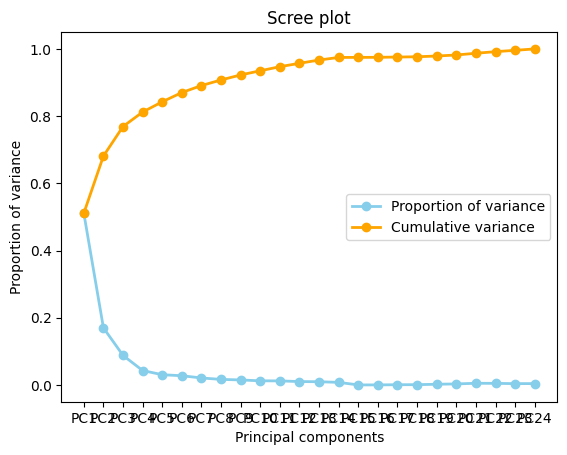

In [425]:
# <Vaš kôd ovdje>
eigenvalues, eigenvectors  = np.linalg.eig(data_povrat_corr)
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]
for idx,el in enumerate(prop_var):
    print(f'PC {idx+1} percentage of variance: {el*100}. Cumulative variance: {cum_var[idx]}')

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()


In [ ]:
k = 8 #Broj glavnih komponenti objasnjavaju > 90% varijance

#### (b)
Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti. Grafički prikažite i usporedite koeficijente prvih nekoliko komponenti.

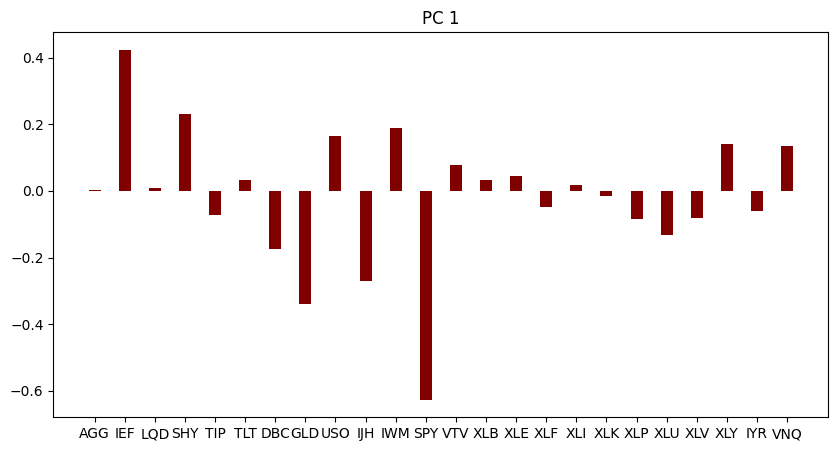

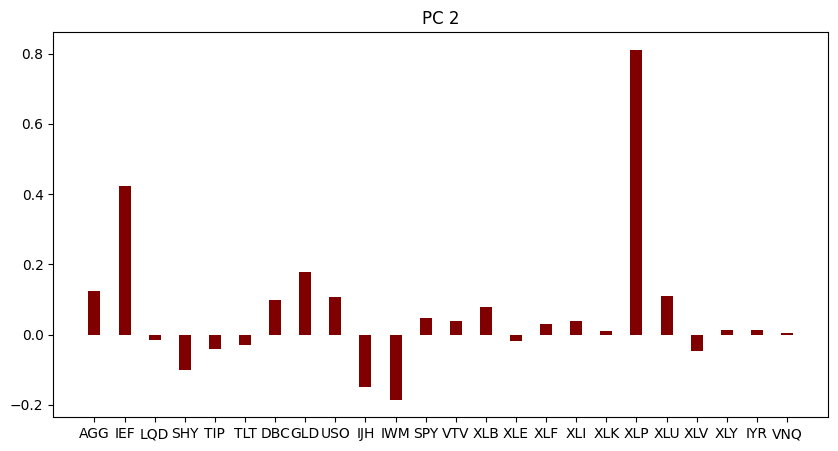

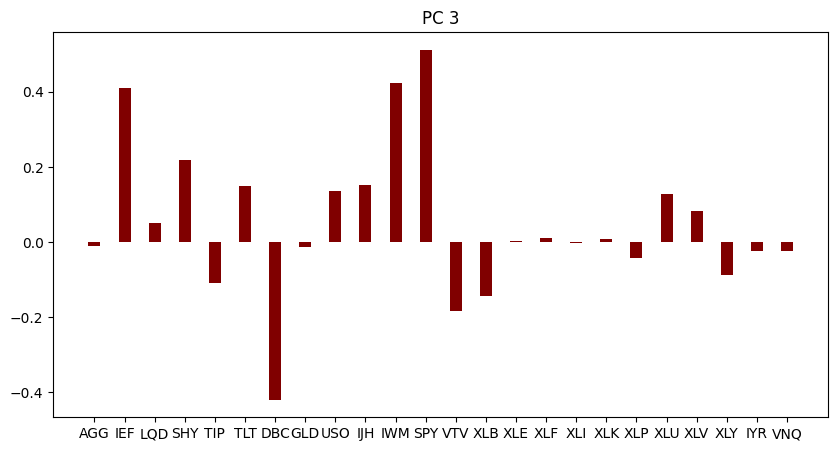

In [427]:
# <Vaš kôd ovdje>
features = data_povrat.columns
for i in range(0,3):  
    fig = plt.figure(figsize = (10, 5))  
    values = eigenvectors[i]
    plt.bar(features, values, color ='maroon',
        width = 0.4)
    plt.title(f'PC {i+1}')
    plt.show()

#### (c) 
Prikažite graf raspršenja prve dvije glavne komponente i proučite možete li primijetiti neke zanimljive grupe. 


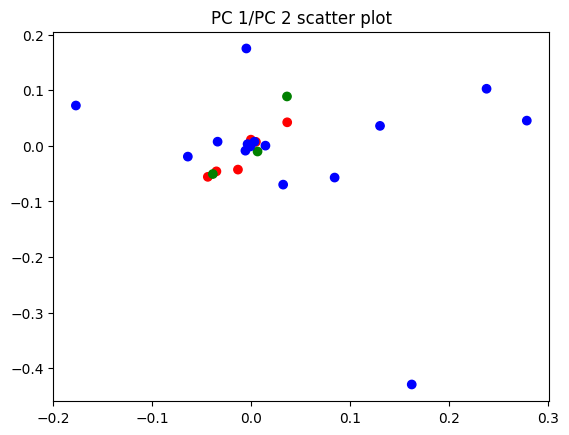

In [500]:
plt.scatter(eigenvectors[0],eigenvectors[1], color=['r','r','r','r','r','r','g','g','g','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b'])
plt.title("PC 1/PC 2 scatter plot")
plt.show()

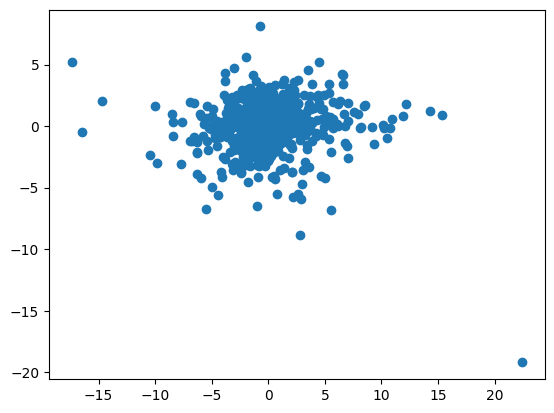

In [431]:
# <Vaš kôd ovdje>
k = 2

reduced_data = np.dot(data_povrat_standard, eigenvectors[:,:k])
reduced_data.shape
plt.scatter(reduced_data[:,0],reduced_data[:,1])
plt.show()


#### (d)
U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Često je dobro pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:
$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.
Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.
Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:
$R_p = \sum{R_i w_i} = R\cdot w$.
Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). Također izračunajte anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja.

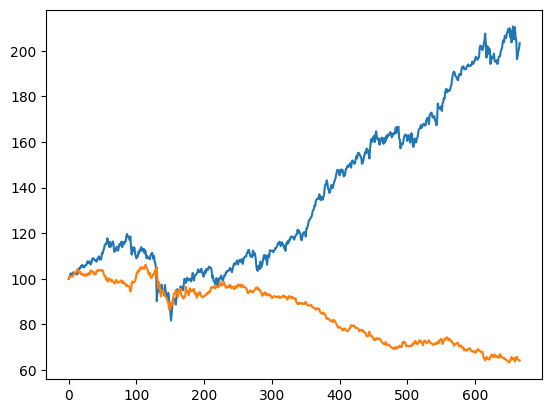

In [494]:
cov = np.cov(data_povrat.T)
eigenvalues, eigenvectors  = np.linalg.eig(cov)
pc1 = eigenvectors[0]
pc2 = eigenvectors[1]
if np.sum(pc1) < 0:
    pc1*(-1)
if np.sum(pc2) < 0:
    pc2*(-1)
for idx,el in enumerate(pc1):
    pc1[idx] = el/np.sum(np.abs(pc1))
for idx, el in enumerate(pc2):
    pc2[idx] = el/np.sum(np.abs(pc2))
pc = np.vstack((pc1, pc2)).T

Rp = np.dot(data_povrat,pc)

portfelj1 = Rp[:,0] 
portfelj2 = Rp[:,1] 
cijena1 = np.zeros(667)
cijena2 = np.zeros(667)
cijena1[0] = 100
cijena2[0] = 100
for idx,el in enumerate(portfelj1):
    cijena1[idx+1] = cijena1[idx]+(cijena1[idx]*portfelj1[idx])
for idx,el in enumerate(portfelj2):
    cijena2[idx+1] = cijena2[idx]+(cijena2[idx]*portfelj2[idx])
plt.plot([i for i in range(0,667)],cijena1)
plt.plot([i for i in range(0,667)],cijena2)



### 2. Faktorska analiza

#### (a)
Na danim podacima odredite broj faktora te provedite faktorsku analizu pomoću dvije različite metode. Procijenite parametre modela te ih usporedite. Koja procjena Vam se čini bolja? Što možete zaključiti iz vrijednosti faktora? Pronađite procjenu vrijednosti faktora koja daje najbolju interpretabilnost.

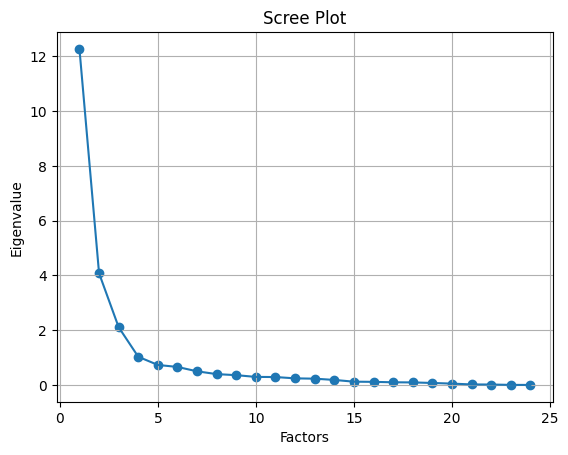

In [439]:
# <Vaš kôd ovdje>
fa = FactorAnalyzer()
fa.fit(data_povrat_standard)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

plt.scatter(range(1,data_povrat.shape[1]+1),ev)
plt.plot(range(1,data_povrat.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

PCA method
           F1        F2        F3
AGG  0.244923  0.864755 -0.019305
IEF -0.170279  0.906649 -0.027765
LQD  0.298610  0.833155 -0.078608
SHY -0.297451  0.654327  0.128271
TIP  0.079680  0.849352  0.166202
TLT -0.179725  0.797526 -0.141373
DBC  0.094059 -0.062268  0.905515
GLD -0.193265  0.221343  0.681835
USO  0.028175 -0.145165  0.845991
IJH  0.927766 -0.054683  0.088220
IWM  0.906534 -0.082882  0.050223
SPY  0.972158 -0.019098  0.032285
VTV  0.961704 -0.046606  0.021424
XLB  0.775171 -0.090747  0.265039
XLE  0.605230 -0.063935  0.507213
XLF  0.858820 -0.092557 -0.096821
XLI  0.915466 -0.088650  0.022609
XLK  0.869632 -0.083748 -0.000043
XLP  0.850919  0.125867 -0.097867
XLU  0.677473  0.280816  0.059004
XLV  0.862228  0.123771 -0.134168
XLY  0.945693 -0.072796 -0.084617
IYR  0.868134  0.084254 -0.063923
VNQ  0.851874  0.088331 -0.068765
            0
AGG  0.808162
IEF  0.851779
LQD  0.789496
SHY  0.533075
TIP  0.755371
TLT  0.688335
DBC  0.832681
GLD  0.551242
USO  0.737567

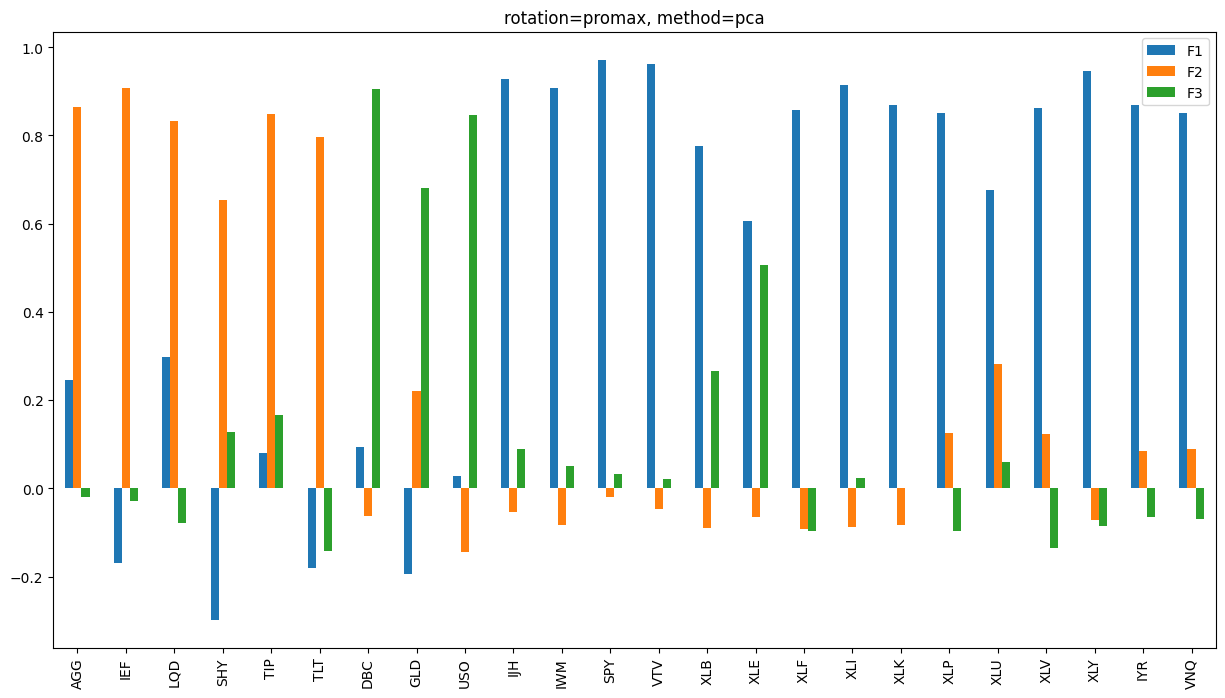

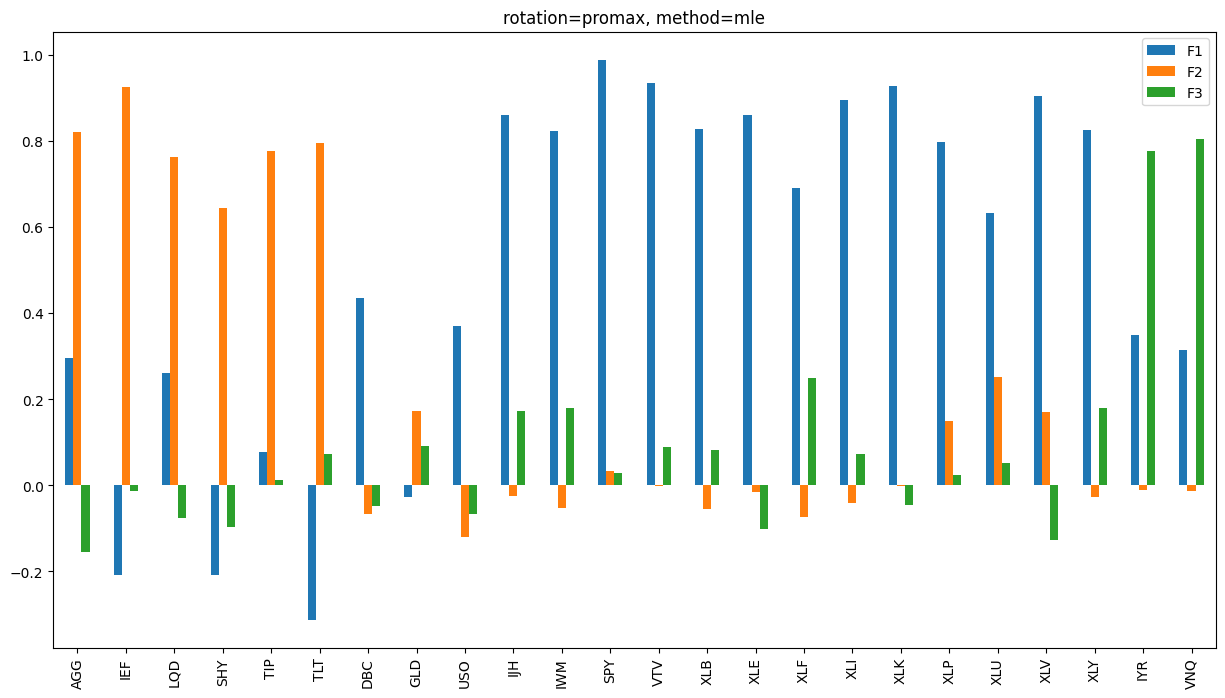

In [440]:
# fig = plt.figure(figsize = (10, 5))
# plt.bar(data_povrat.columns, fa_p.loadings_[:,0], color ='maroon',
#         width = 0.4)

n_factors = 3

fa_p = FactorAnalyzer(n_factors=n_factors, method="principal",rotation="promax")
fa_p.fit(data_povrat_standard)
print("PCA method")
print(pd.DataFrame(fa_p.loadings_,index=data_povrat.columns, columns=["F1","F2","F3"]))
print(pd.DataFrame(fa_p.get_communalities(),index=data_povrat.columns))

fa_mle = FactorAnalyzer(n_factors=n_factors, method="mle",rotation="promax")
fa_mle.fit(data_povrat_standard)
print("MLE method")
print(pd.DataFrame(fa_mle.loadings_,index=data_povrat.columns, columns=["F1","F2","F3"]))
print(pd.DataFrame(fa_mle.get_communalities(),index=data_povrat.columns))

pd.DataFrame(fa_p.loadings_,index=data_povrat.columns, columns=["F1","F2","F3"]).plot(kind="bar", figsize=(15,8))
plt.title("rotation=promax, method=pca")
plt.show()

pd.DataFrame(fa_mle.loadings_,index=data_povrat.columns, columns=["F1","F2","F3"]).plot(kind="bar", figsize=(15,8))
plt.title("rotation=promax, method=mle")
plt.show()

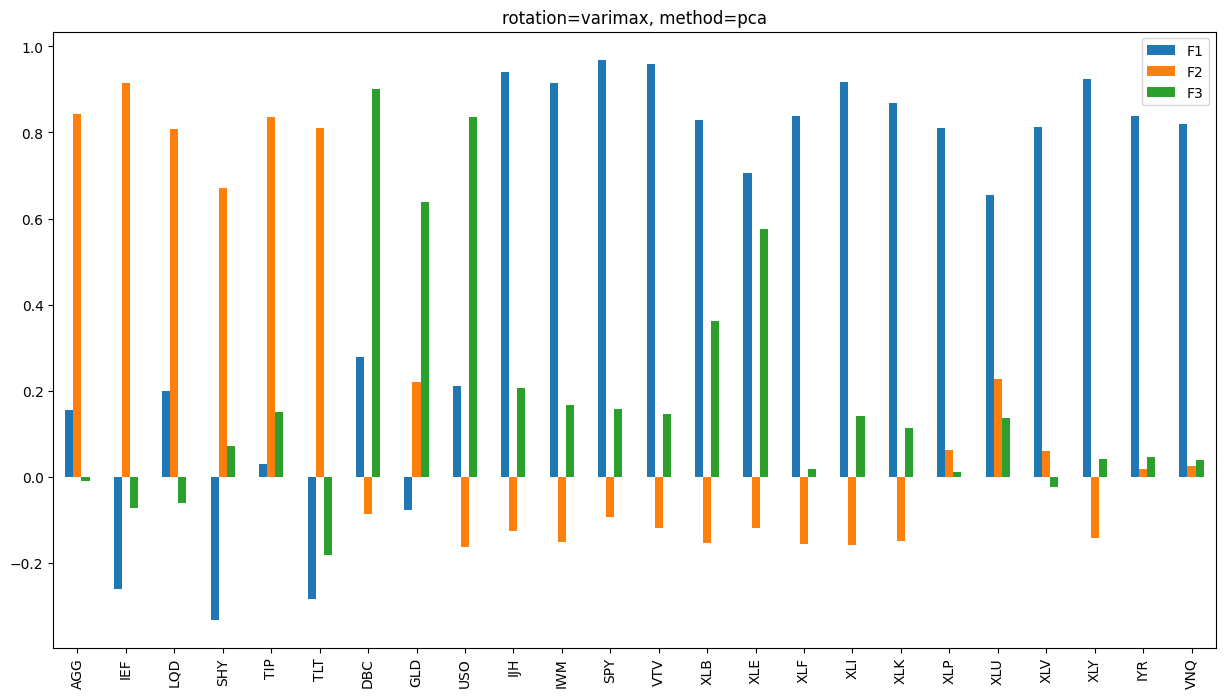

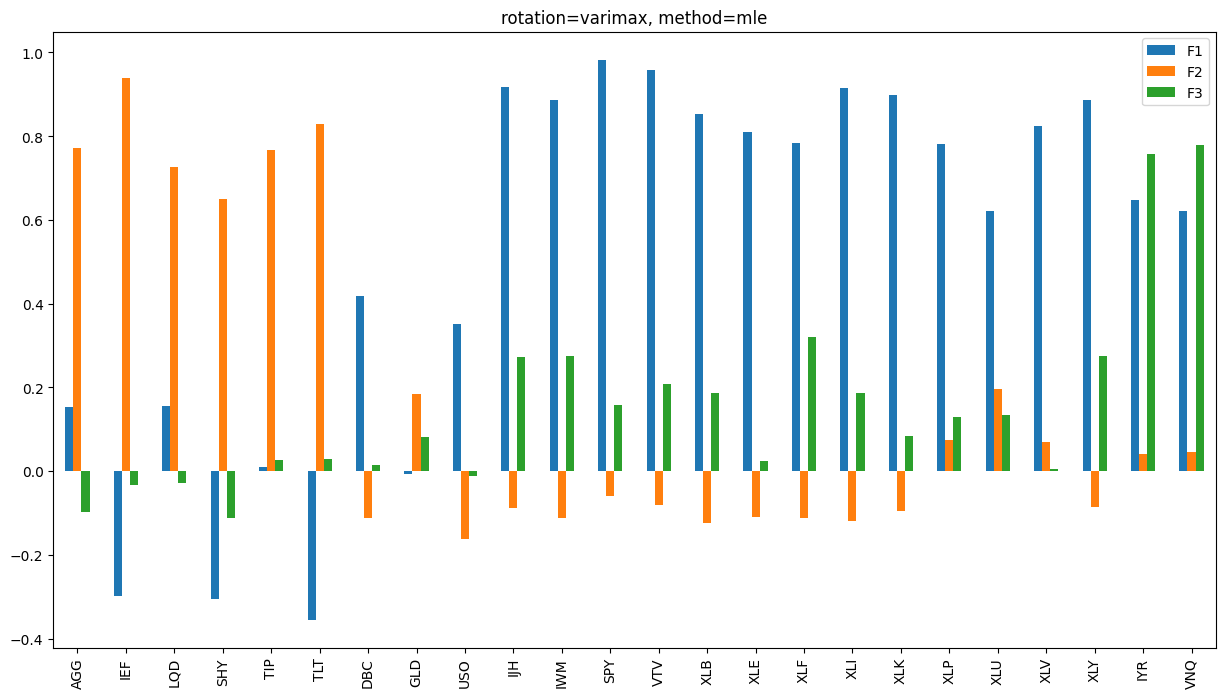

In [434]:
fa_p = FactorAnalyzer(n_factors=n_factors, method="principal",rotation="varimax")
fa_p.fit(data_povrat_standard)

fa_mle = FactorAnalyzer(n_factors=n_factors, method="mle",rotation="varimax")
fa_mle.fit(data_povrat_standard)

pd.DataFrame(fa_p.loadings_,index=data_povrat.columns, columns=["F1","F2","F3"]).plot(kind="bar", figsize=(15,8))
plt.title("rotation=varimax, method=pca")
plt.show()

pd.DataFrame(fa_mle.loadings_,index=data_povrat.columns, columns=["F1","F2","F3"]).plot(kind="bar", figsize=(15,8))
plt.title("rotation=varimax, method=mle")
plt.show()

#### (b)
Izračunajte specifične varijance faktora za model s dva faktora i model s tri faktora. Pomoću stupčastog dijagrama prikažite i usporedite dobivene vrijednosti. 

<AxesSubplot: >

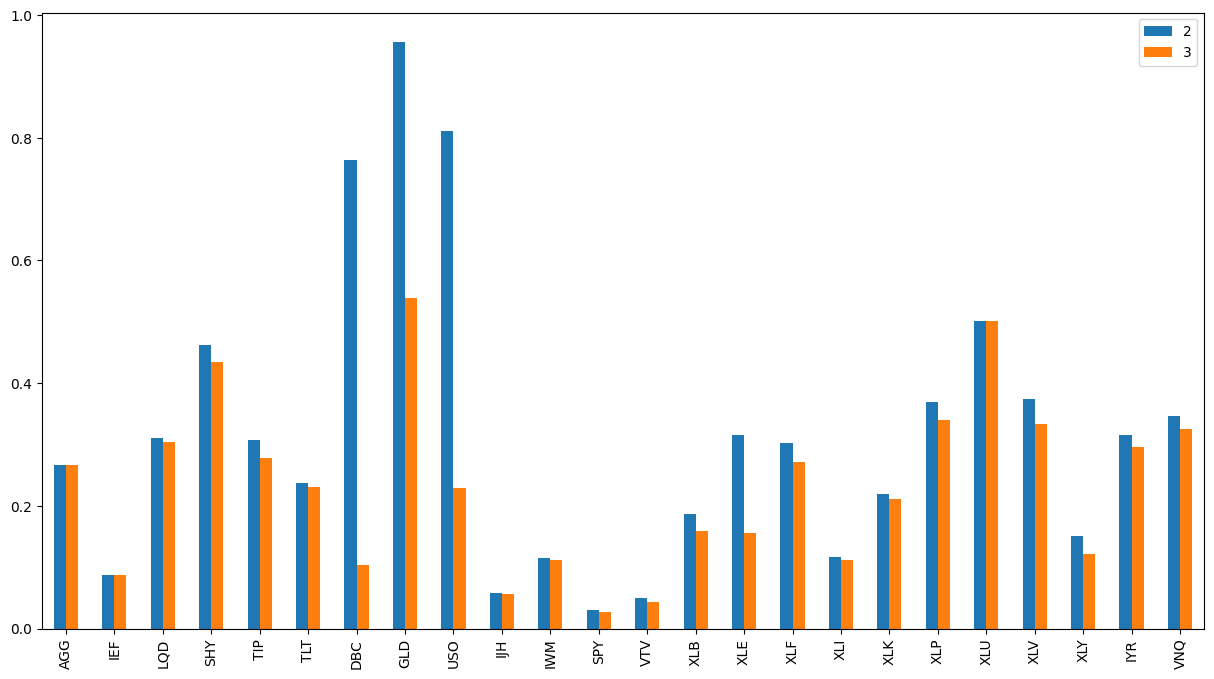

In [442]:
# <Vaš kôd ovdje>
specific_factors = pd.DataFrame()
n_factors = [2,3]
for factors in n_factors:
    fa_p = FactorAnalyzer(n_factors=factors, method="principal",rotation="varimax")
    fa_p.fit(data_povrat_standard)
    communalities = fa_p.get_communalities()
    total_variances = np.var(data_povrat_standard, axis=0) 
    specific_variances = total_variances - communalities 
    specific_factors[f'{factors}'] = pd.DataFrame(specific_variances,index=data_povrat.columns)
specific_factors.plot(kind="bar", figsize=(15,8))

# fa_p.get_factor_variance()

### 3. Multivarijatna linearna regresija

#### (a)
Provedite 3 univarijatne linearne regresije koristeći povrate ETF-ova `AGG`, `DBC` i `SPY` kao zavisne varijable. Svaku regresiju provedite sa svim preostalim povratima ETF-ova kao nezavnim varijablama. Za svaku regresiju ispišite koeficijente te njihovu signifikantnost.

In [435]:
# <Vaš kôd ovdje>
y = data_povrat['AGG']
X = data_povrat.drop(['AGG'], axis=1)
X = sm.add_constant(X)
reg_AGG = sm.OLS(y,X).fit()

print(reg_AGG.summary())
#-------------------------------------------
y = data_povrat['DBC']
X = data_povrat.drop(['DBC'], axis=1)
X = sm.add_constant(X)
reg_AGG = sm.OLS(y,X).fit()

print(reg_AGG.summary())
#-------------------------------------------
y = data_povrat['SPY']
X = data_povrat.drop(['SPY'], axis=1)
X = sm.add_constant(X)
reg_AGG = sm.OLS(y,X).fit()

print(reg_AGG.summary())

                            OLS Regression Results                            
Dep. Variable:                    AGG   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     94.93
Date:                Sun, 07 May 2023   Prob (F-statistic):          3.79e-189
Time:                        13:05:24   Log-Likelihood:                 2864.6
No. Observations:                 666   AIC:                            -5681.
Df Residuals:                     642   BIC:                            -5573.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.209      0.2

#### (b)
Provedite multivarijatnu linearnu regresiju koristeći ETF-ove `AGG`, `DBC` i `SPY` kao zavisne varijable. Za nezavisne varijable uzmite sve preostale ETF-ove. Ispišite signifikantnost koeficijenata multivarijatne regresije. 

In [436]:

y = data_povrat[['AGG', 'DBC', 'SPY']]
X = data_povrat.drop(['AGG', 'DBC', 'SPY'], axis=1)
model = SUR.multivariate_ls(y, sm.add_constant(X)).fit()

# Print model summary
print(model.summary)

                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.9017
No. Equations.:                     3   McElroy's R-squared:                 0.9844
No. Observations:                 666   Judge's (OLS) R-squared:             0.9017
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9997
Time:                        13:05:27   Dhrymes's R-squared:                 0.9017
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const      -5.802e-05     0.0002    -0.3058     0.7598     -0.0004      0.0003
IEF         

#### (c)
Ponovite proceduru iz (b), ali zadržite samo varijable s koeficijentima na 0.05 razini signifikantnosti. Usporedite ovaj model s modelom iz (b).  Je li izbacivanje varijabli dovelo do pogoršanja modela?


In [493]:
# <Vaš kôd ovdje>
y = data_povrat[['AGG', 'DBC', 'SPY']]
X = data_povrat.drop(['AGG', 'DBC', 'SPY'], axis=1)
model = SUR.multivariate_ls(y, sm.add_constant(X)).fit()

summary_table1 = model.summary.tables[1]
summary_table2= model.summary.tables[2]
summary_table3= model.summary.tables[3]
data = np.array(summary_table1.data)
data2 = np.array(summary_table2.data)
data3 = np.array(summary_table3.data)
pvalues = data[1:, 4].astype(float)
pvalues2 = data2[1:, 4].astype(float)
pvalues3 = data3[1:, 4].astype(float)
coefficients = data[1:, 1].astype(float)
significant_vars = [var for i, var in enumerate(X.columns) if pvalues[i+1] < 0.05]
significant_vars2 = [var for i, var in enumerate(X.columns) if pvalues2[i+1] < 0.05]
significant_vars3 = [var for i, var in enumerate(X.columns) if pvalues3[i+1] < 0.05]

X = data_povrat[['LQD','XLE','XLU']]
model = SUR.multivariate_ls(y, sm.add_constant(X)).fit()
print(model.summary)


                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.5923
No. Equations.:                     3   McElroy's R-squared:                 0.6757
No. Observations:                 666   Judge's (OLS) R-squared:             0.5923
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9296
Time:                        18:53:11   Dhrymes's R-squared:                 0.5923
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.0002     0.0003     0.7712     0.4406     -0.0003      0.0007
LQD         

### 4. Kanonička korelacijska analiza

Za potrebe ovog zadatka standardizirajte podatke i podijelite skup ETF-ova na dva skupa tako da: 
- prvi skup sadrži: `AGG`, `LQD`, `TIP` ,`DBC`, `USO`,`IWM`, `VTV`, `XLE`, `XLI`, `XLP`, `XLV`, `IYR`,  
- drugi skup sadrži: `IEF`, `LQD`, `SHY`, `TLT`, `GLD`, `IJH`,`SPY`, `XLB`, `XLF`, `XLK`, `XLU`,`XLY`, `VNQ`.


In [ ]:
# <Vaš kôd ovdje>

#### (a) 
Provedite kanoničku korelacijsku analizu s maksimalnim brojem parova kanoničkih varijabli. Koliko kanoničkih parova je statistički značajno? 

In [ ]:
# <Vaš kôd ovdje>

#### (b)
Pomoću *scree plota* prikažite korelacije dobivenih parova kanoničkih varijabli. 

In [ ]:
# <Vaš kôd ovdje>

#### (c)
Promotrite korelacije između kanoničkih varijabli i originalnih varijabli kako bi interpretirali kanoničke varijable u terminima originalnih. Za svaki skup posebno pomoću stupčastog dijagrama prikažite korelacije originalnih varijabli i prva tri para kanoničkih varijabli (slično kao u zadatku 1.(b)). 

**Hint**: Interpretacija populacijskih kanoničkih varijabli (Predavanje 7)

In [ ]:
# <Vaš kôd ovdje>